<a href="https://colab.research.google.com/github/juancabrera-r/train_DreamBooth_SD/blob/main/fast_DreamBooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab Pro notebook from https://github.com/TheLastBen/fast-stable-diffusion** *Alternatives : [RunPod](https://www.runpod.io/console/gpu-browse?template=runpod-stable-unified)  | [Paperspace](https://console.paperspace.com/github/TheLastBen/PPS?machine=Free-GPU)*
## **[Support](https://ko-fi.com/thelastben)**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Dependencies

In [ ]:
from IPython.utils import capture
import time
import os

print('[1;32mInstalling dependencies...')
with capture.capture_output() as cap:
    os.chdir('/content')
    !pip install -qq --no-deps accelerate==0.12.0
    !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/dbdeps.txt
    !dpkg -i *.deb
    !tar -C / --zstd -xf gcolabdeps.tar.zst
    !rm *.deb | rm *.zst | rm *.txt
    !git clone -q --depth 1 --branch main https://github.com/TheLastBen/diffusers
    !pip install gradio==3.16.2 --no-deps -qq

    if not os.path.exists('gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4'):
        %env CXXFLAGS=-std=c++14
        !wget -q https://github.com/gperftools/gperftools/releases/download/gperftools-2.5/gperftools-2.5.tar.gz && tar zxf gperftools-2.5.tar.gz && mv gperftools-2.5 gperftools
        !wget -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/Patch
        %cd /content/gperftools
        !patch -p1 < /content/Patch
        !./configure --enable-minimal --enable-libunwind --enable-frame-pointers --enable-dynamic-sized-delete-support --enable-sized-delete --enable-emergency-malloc; make -j4
        !mkdir -p /content/gdrive/MyDrive/sd/libtcmalloc && cp .libs/libtcmalloc*.so* /content/gdrive/MyDrive/sd/libtcmalloc
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4
        %cd /content
        !rm *.tar.gz Patch && rm -r /content/gperftools
    else:
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    os.environ['PYTHONWARNINGS'] = 'ignore'
    !sed -i 's@raise AttributeError(f"module {module!r} has no attribute {name!r}")@@g' /usr/local/lib/python3.10/dist-packages/jax/_src/deprecations.py

print('[1;32mDone, proceed')

Installing dependencies...


In [ ]:
# test bitsandbytes
import bitsandbytes
import torch
print(torch.__version__)

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import numpy as np

#HuggingFace

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# Inferencia

/content


  0%|          | 0/50 [00:00<?, ?it/s]

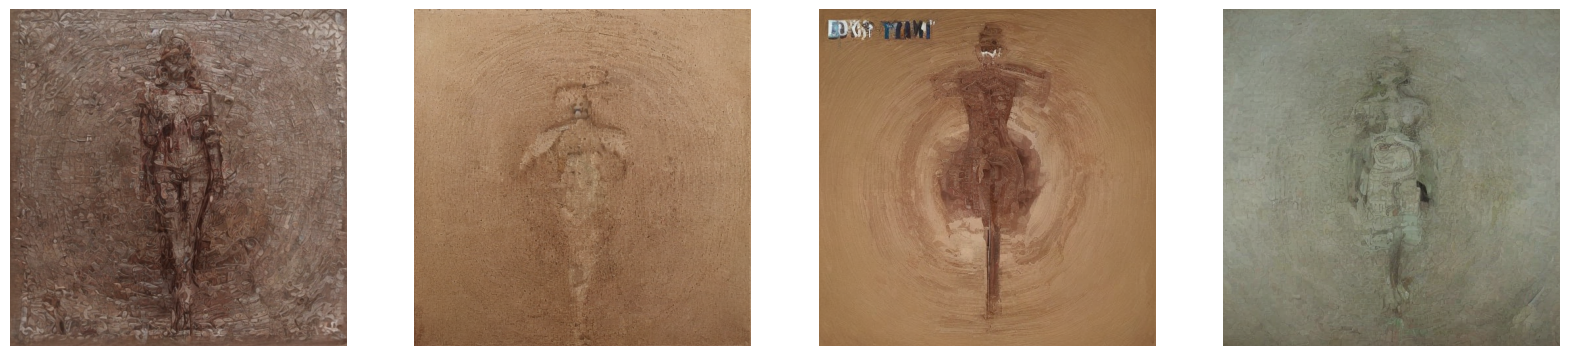

In [ ]:
prompt = "a body with $psndk" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_samples = 4 #@param {type:"number"}
guidance_scale = 1 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}
seed = -1 #@param {type:"number"}

%cd /content/


if 'pipe' not in locals():
  pipe = StableDiffusionPipeline.from_pretrained("JuanCab/fine-tune-model-final-13-10000", safety_checker=None, torch_dtype=torch.float16).to("cuda")
  pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
  g_cuda = None



g_cuda = torch.Generator(device='cuda')

g_cuda.manual_seed(seed)

from torch import autocast
with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

    fig=figure(figsize=(5*num_samples,5*num_samples))
    for i in range(num_samples):
        a=fig.add_subplot(1, num_samples,i+1)
        imshow(images[i])
        axis('off')

Disconect

In [ ]:
from google.colab import runtime
runtime.unassign()